In [1]:
cd("/Users/elfflorin/Documents/Projects/julia.hw/jpie");
using Lexicon;
using brml;


Available Demos:

demoBurglar.jl
demoBurglarDictPot.jl
demoBurglarSimple.jl
demoChainIndepRational.jl
demoHMMInferenceFG.jl
demoHMMInferenceSimple.jl
demoHMMlearn.jl
demoMaxProd.jl
demoPlotDAG.jl
demoPotLogArray.jl
demoSumProd.jl
demoSumProdStandardiseVariables.jl


INFO: Loading help data...


The domain for visible states: $V = \{1, 2, 3, 4, 5\}$  <br/>
The domain for hidden states: $H = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$ <br/>
The number of timesteps: $T = 20$

In [2]:
V = 5  # number of visible states
H = 10 # number of hidden states
T = 20 # number of timesteps

20

Initialize the time-series vectors **h, v** for the hidden and visible variables

In [17]:
h = zeros(Integer,1,T) # holds the state value for the hidden variable at a specific timestep
v = zeros(Integer,1,T) # holds the state value for the visible variable at a specific timestep

1x20 Array{Integer,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

The probabilities for the hidden variable states at timestep 1: $p(h_{1})$ 

In [4]:
ph1 = condp(rand(H,1)) # probabilities for the states of the hidden variable at timestep 1

10x1 Array{Float64,2}:
 0.0346346
 0.0541398
 0.0851892
 0.106614 
 0.0679381
 0.150623 
 0.149616 
 0.0469823
 0.219919 
 0.0843433

Initialize the transition matrix **$phghm_{10x10}$** with
$$\begin{eqnarray}
  phghm(i, j) = p(h_t = i | h_{t-1} = j) \\
  \sum_{i = 1}^{10} phghm(i, j) = 1
 \end{eqnarray}
$$

In [5]:
phghm=condp(eye(H,H)) # transition matrix with sum(phghm, 1) = 1 with phghm[i, j] = p(hg=i | hm=j), hg @t, hm @t-1
# shuffle the column data in phghm while keeping sum(phghm, 1) = 1
# done as below no 2 columns have value 1.0 on the same row
phghmtmp=condp(eye(H,H))
r = randperm(H)
for (i, value) in enumerate(r)
    phghm[:, i] = phghmtmp[:, value]
end
phghm

10x10 Array{Float64,2}:
 2.22507e-308  2.22507e-308  2.22507e-308  …  2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  1.0           2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308  …  2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     1.0           2.22507e-308
 1.0           2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  1.0              2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  1.0         

Initialize the emission matrix **$pvgh \in R^{5x10}$** with
$$\begin{eqnarray}
  pvgh(i, j) = p(v_t = i | h_{t} = j) \\
  \sum_{i = 1}^{5} pvgh(i, j) = 1
 \end{eqnarray}
$$

In [6]:
pvgh=condp((rand(V,H))) # emision matrix with sum(pvgh, 1) = 1 with pvgh[i, j] = p(vg = i | h = j), vg, h @ t

5x10 Array{Float64,2}:
 0.242923  0.200209  0.28148    0.0908806  …  0.0722245  0.32939    0.216689 
 0.138455  0.16897   0.027486   0.144491      0.275516   0.367327   0.0476552
 0.252577  0.193486  0.487894   0.222074      0.298345   0.102871   0.312648 
 0.154447  0.334592  0.0232612  0.241123      0.266386   0.13212    0.105934 
 0.211599  0.102743  0.179879   0.301432      0.0875289  0.0682919  0.317073 

In [7]:
h[1]=randgen(ph1) # initialize the hidden variable @t=1 with a random state based on ph1 distribution
v[1]=randgen(pvgh[:,h[1]]) # initialize the visible variable @t=1 with a random state based on pvgh( vg | h@t=1)

for t=2:T
    h[t]=randgen(phghm[:,h[t-1]]) # set the hidden variable state @t based on h@t-1 using the transition matrix
    v[t]=randgen(pvgh[:,h[t]]) # set the visible variable state @t based on h@t using the emission matrix
end

In [8]:
(alpha, loglik) = HMMforward(v, phghm, ph1, pvgh); # filtering
println("Log Likelihood = $loglik")

Log Likelihood = -28.938123848609123


In [9]:
gamma = HMMsmooth(v, phghm, ph1, pvgh, alpha); # smoothing

10x20 Array{Float64,2}:
 1.05302e-5   0.000167175  0.000624272  …  0.0182349    0.000559428
 0.000624272  0.0182349    0.000559428     1.05302e-5   0.000167175
 2.39498e-7   0.979505     1.4527e-5       1.4527e-5    5.50691e-6 
 0.000167175  0.000624272  0.0182349       0.000559428  1.05302e-5 
 0.0182349    0.000559428  1.05302e-5      0.000167175  0.000624272
 0.979505     1.4527e-5    5.50691e-6   …  5.50691e-6   2.39498e-7 
 1.4527e-5    5.50691e-6   2.39498e-7      2.39498e-7   0.979505   
 0.000559428  1.05302e-5   0.000167175     0.000624272  0.0182349  
 5.50691e-6   2.39498e-7   0.979505        0.979505     1.4527e-5  
 0.000878749  0.000878749  0.000878749     0.000878749  0.000878749

In [10]:
(maxstate, logprob) = HMMviterbi(v, phghm, ph1, pvgh)
println("most likely path (viterbi):")
println(maxstate)

most likely path (viterbi):
[6 3 9 7 6 3 9 7 6 3 9 7 6 3 9 7 6 3 9 7]


In [11]:
println("original path (hidden states):")
println(h)

original path (hidden states):
[6 3 9 7 6 3 9 7 6 3 9 7 6 3 9 7 6 3 9 7]


In [12]:
println("original path (visible states):")
println(v)

original path (visible states):
[3 3 5 1 4 1 1 4 4 3 4 1 3 5 1 1 2 5 2 3]


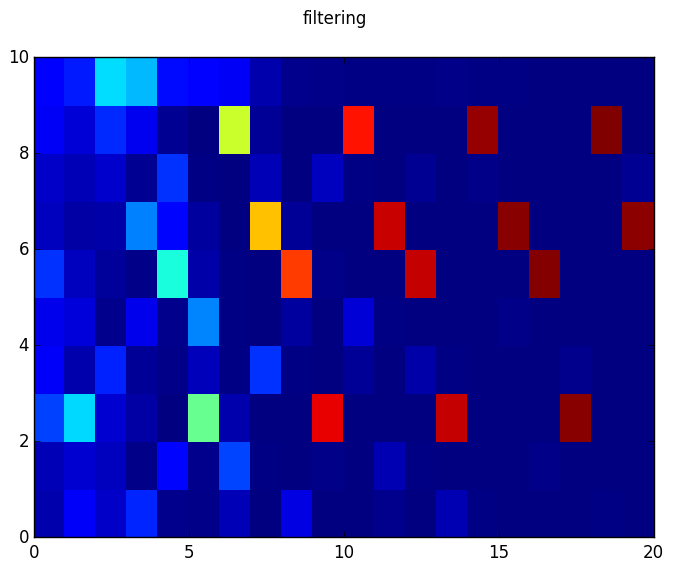

Figure(PyObject <matplotlib.figure.Figure object at 0x10b3dc150>)

In [13]:
PyPlot.pcolor(alpha); PyPlot.suptitle("filtering")
PyPlot.figure()

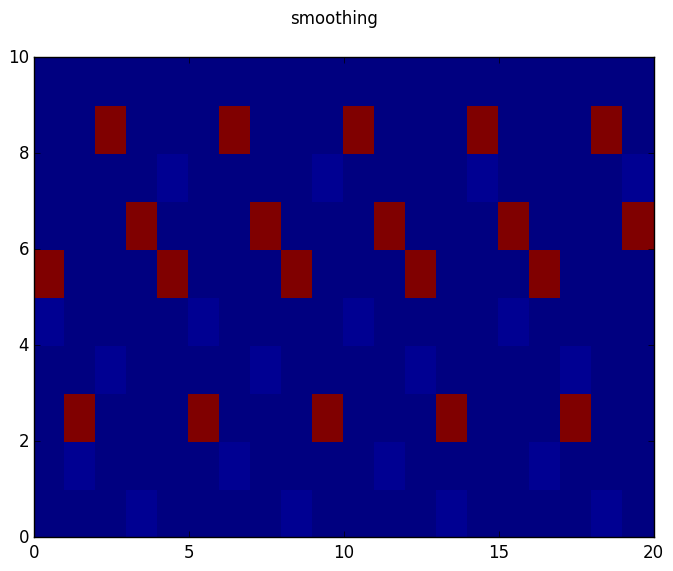

PyObject <matplotlib.text.Text object at 0x114c537d0>

In [14]:
PyPlot.pcolor(gamma); PyPlot.suptitle("smoothing")